In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv("D:/Data Sets/spam.csv", encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Drop the Non-significant Column

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.shape

(5572, 2)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

## Remove the Unwanted Symbol

In [12]:
# Function to clean text (keep only words)
import re
def clean_text(text):
    text = re.sub(r'[^A-Za-z]', ' ', text)  # Remove everything except letters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

# Apply cleaning function to messages
df['v2'] = df['v2'].apply(clean_text)

## Remove the StopWords

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')
print(stopwords.words('english'))
# Get English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()  # Tokenize (split into words)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Join back into a single string

In [16]:
# Apply function to 'v2' column
df['v2'] = df['v2'].astype(str).apply(remove_stopwords)

In [17]:
df.head()

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


## Perform Count Vectorization on the Data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform text data into numerical form
X = vectorizer.fit_transform(df['v2'])
y = df['v1']

## Applying LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'label' column
df['v1'] = label_encoder.fit_transform(df['v1'])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape

(4457, 7546)

In [22]:
y_train.shape

(4457,)

In [23]:
X_test.shape,y_test.shape

((1115, 7546), (1115,))

## Applying Smote for balancing the data

In [24]:
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Fit the Model

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Train Naïve Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

## For Train Data

In [27]:
# Get predictions for training data
y_train_pred = nb_model.predict(X_train_resampled)
# Calculate train and test accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.9141


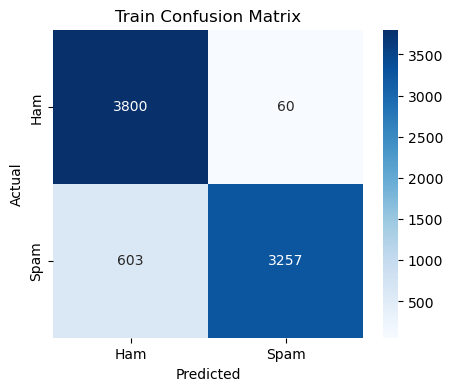

In [28]:
# Generate confusion matrices
cm_train = confusion_matrix(y_train_resampled, y_train_pred)
# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    # Plot Test Confusion Matrix
plot_confusion_matrix(cm_train, "Train Confusion Matrix")

In [29]:
# Get predictions for training data
y_train_pred = nb_model.predict(X_train_resampled)

# Get predictions for testing data
y_test_pred = nb_model.predict(X_test)

# Calculate train and test accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Train Accuracy: 0.9141
Test Accuracy: 0.9623


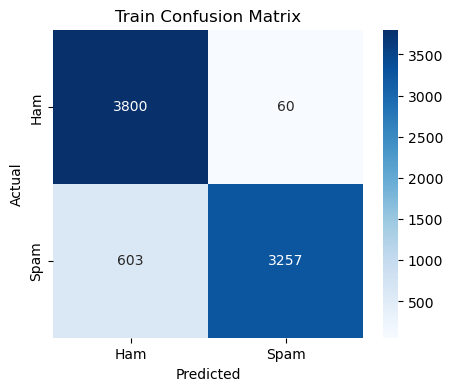

In [30]:
cm_train = confusion_matrix(y_train_resampled, y_train_pred)
# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot Train Confusion Matrix
plot_confusion_matrix(cm_train, "Train Confusion Matrix")

## For Test Data

In [31]:
# Get predictions for testing data
y_test_pred = nb_model.predict(X_test)
# Calculate and test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9623


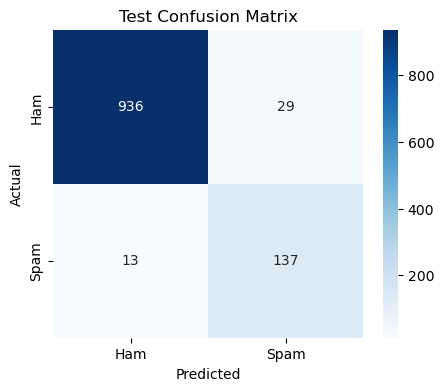

In [32]:
cm_test = confusion_matrix(y_test, y_test_pred)
# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    # Plot Test Confusion Matrix
plot_confusion_matrix(cm_test, "Test Confusion Matrix")

In [37]:
print("\n Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


 Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       965
        spam       0.83      0.91      0.87       150

    accuracy                           0.96      1115
   macro avg       0.91      0.94      0.92      1115
weighted avg       0.96      0.96      0.96      1115


 Confusion Matrix:
[[936  29]
 [ 13 137]]
